# Importing necessary Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading the data and further cleaning

In [2]:
raw_df = pd.read_csv('C:\\Users\\LENOVO PC\\OneDrive\Desktop\\dsa\\spotify_song_analysis\\Popular_Spotify_Songs.csv', encoding = 'latin-1')
raw_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
raw_df.shape

(953, 24)

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
index_names = raw_df[raw_df['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3' ].index
raw_df.drop(index=index_names, inplace=True)
raw_df.streams = raw_df.streams.astype('int64')

In [6]:
df = raw_df.drop(columns=['in_apple_playlists','in_apple_charts','in_deezer_playlists','in_deezer_charts','in_shazam_charts','key','mode','speechiness_%','acousticness_%','instrumentalness_%'])
df.shape

(952, 14)

In [7]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'bpm', 'danceability_%', 'valence_%',
       'energy_%', 'liveness_%'],
      dtype='object')

In [8]:
df['artist(s)_name'].head(10)

0              Latto, Jung Kook
1                   Myke Towers
2                Olivia Rodrigo
3                  Taylor Swift
4                     Bad Bunny
5             Dave, Central Cee
6    Eslabon Armado, Peso Pluma
7                       Quevedo
8                         Gunna
9         Peso Pluma, Yng Lvcas
Name: artist(s)_name, dtype: object

In [9]:
temp = df['artist(s)_name'].str.split(',').str[0]
df['artist(s)_name'] = temp
df.rename(columns={'artist(s)_name':'artist'}, inplace=True)
df['artist'].head()

0             Latto
1       Myke Towers
2    Olivia Rodrigo
3      Taylor Swift
4         Bad Bunny
Name: artist, dtype: object

In [10]:
df.head()

,track_name,artist,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,bpm,danceability_%,valence_%,energy_%,liveness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,2,2023,7,14,553,147,141381703,125,80,89,83,8
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,92,71,61,74,10
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,138,51,32,53,31
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,170,55,58,72,11
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,144,65,23,80,11


In [11]:
temp = pd.DataFrame({'year':df.released_year, 'month':df.released_month, 'day':df.released_day})
temp = pd.to_datetime(temp).dt.day_name()
df.released_day = temp
df.head()

,track_name,artist,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,bpm,danceability_%,valence_%,energy_%,liveness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,2,2023,7,Friday,553,147,141381703,125,80,89,83,8
1,LALA,Myke Towers,1,2023,3,Thursday,1474,48,133716286,92,71,61,74,10
2,vampire,Olivia Rodrigo,1,2023,6,Friday,1397,113,140003974,138,51,32,53,31
3,Cruel Summer,Taylor Swift,1,2019,8,Friday,7858,100,800840817,170,55,58,72,11
4,WHERE SHE GOES,Bad Bunny,1,2023,5,Thursday,3133,50,303236322,144,65,23,80,11


# Exploratory Data Analysis

#### Here we will explore the data and try to gain as much insight as possible

## No. of Unique Artist

In [12]:
len(df['artist'].unique())

458

Their are total 458 unique artist in the dataset

## Number of Songs released (1980-2022)

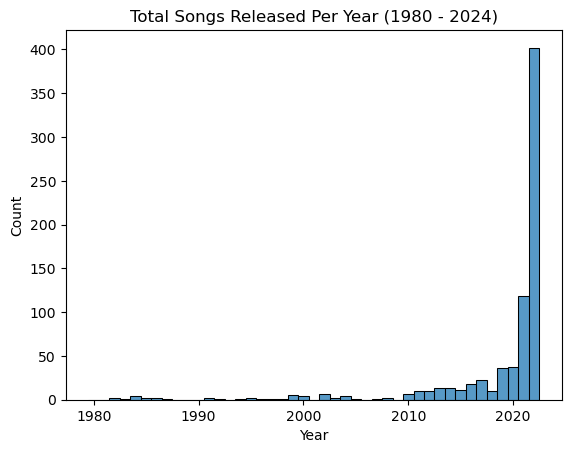

In [13]:
ax = sns.histplot(df['released_year'], binrange=(1980, 2022), discrete=True)
ax.set(xlabel='Year', ylabel='Count')
ax.set_title('Total Songs Released Per Year (1980 - 2024)')
plt.show()

Most of the songs in dataset were released in year 2022

## Trend of Song Release Month

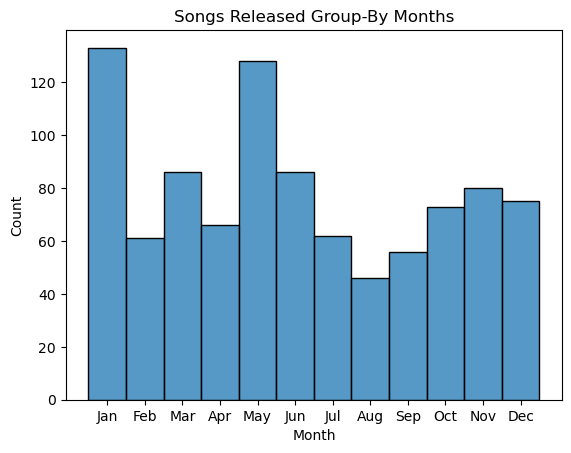

In [14]:
ax = sns.histplot(df['released_month'], discrete=True)
ax.set(xlabel='Month', ylabel='Count')
ax.set_title('Songs Released Group-By Months')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

January saw the most released of the songs followed by May. August witness least song release.

## Trend of Song release Day

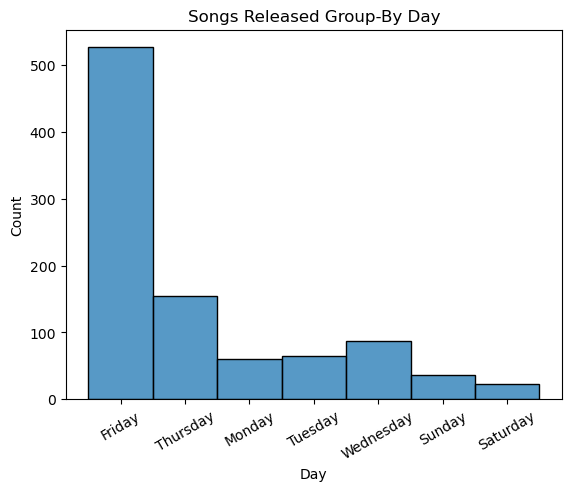

In [15]:
ax = sns.histplot(df['released_day'])
ax.set(xlabel='Day', ylabel='Count')
ax.set_title('Songs Released Group-By Day')
plt.xticks(rotation = 30)
plt.show()

Most of the songs were released on Friday. This can be because people are more likely to stream music on weekends when they are free.

## Top 10 Artist with most song released

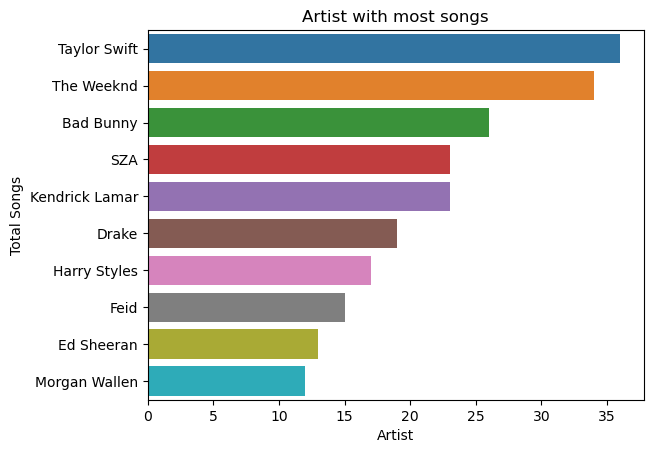

In [17]:
temp = df.artist.value_counts().to_frame().head(10).iloc[:, 0]
temp_df = pd.DataFrame({'artist':temp.index, 'count':temp})

ax = sns.barplot(temp_df, y = 'artist', x = 'count')
ax.set(xlabel='Artist', ylabel='Total Songs')
ax.set_title('Artist with most songs')

plt.show()

Taylor Swift have the most songs released, followed by The Weeknd and Spanish Singer Bad Bunny.

## Total Song Artist Count Comparison

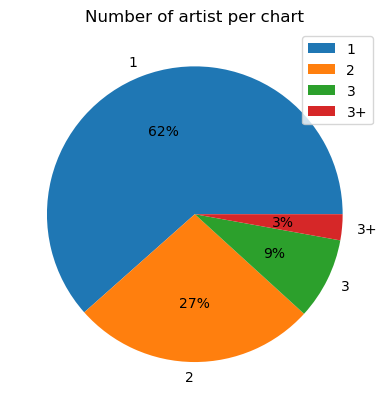

In [18]:
temp = df.artist_count.value_counts()
data = [temp.iloc[0], temp.iloc[1], temp.iloc[2], sum(temp.iloc[3:])]
labels = ['1', '2', '3', '3+']

plt.pie(data, labels=labels, autopct='%.0f%%')
plt.legend()
plt.title('Number of artist per chart')
plt.show() 

A whopping 62% of songs were made by single artist, followed by 27% duets.
Only 9% songs were made by collaboration of 3 artist and rest songs had 3+ artist

## Beats Per Minute (BPM) 

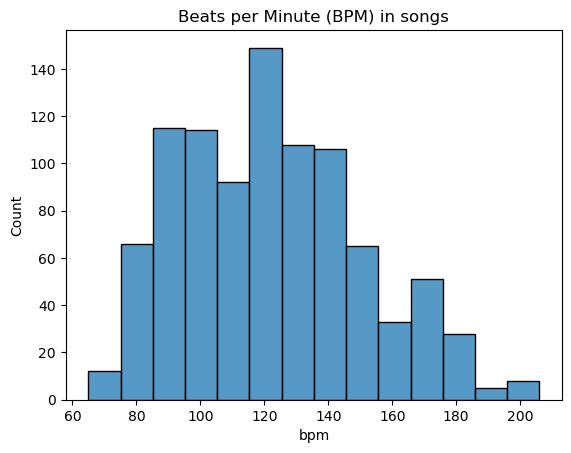

In [19]:
ax = sns.histplot(df, x='bpm', bins=14)
ax.set_title('Beats per Minute (BPM) in songs')
plt.show()

120 BPM was the artist favourite. While 90,100,130 and 140 have equal preference among others.

## Top 10 songs according to their number in Playlist, Chart and Total Stream

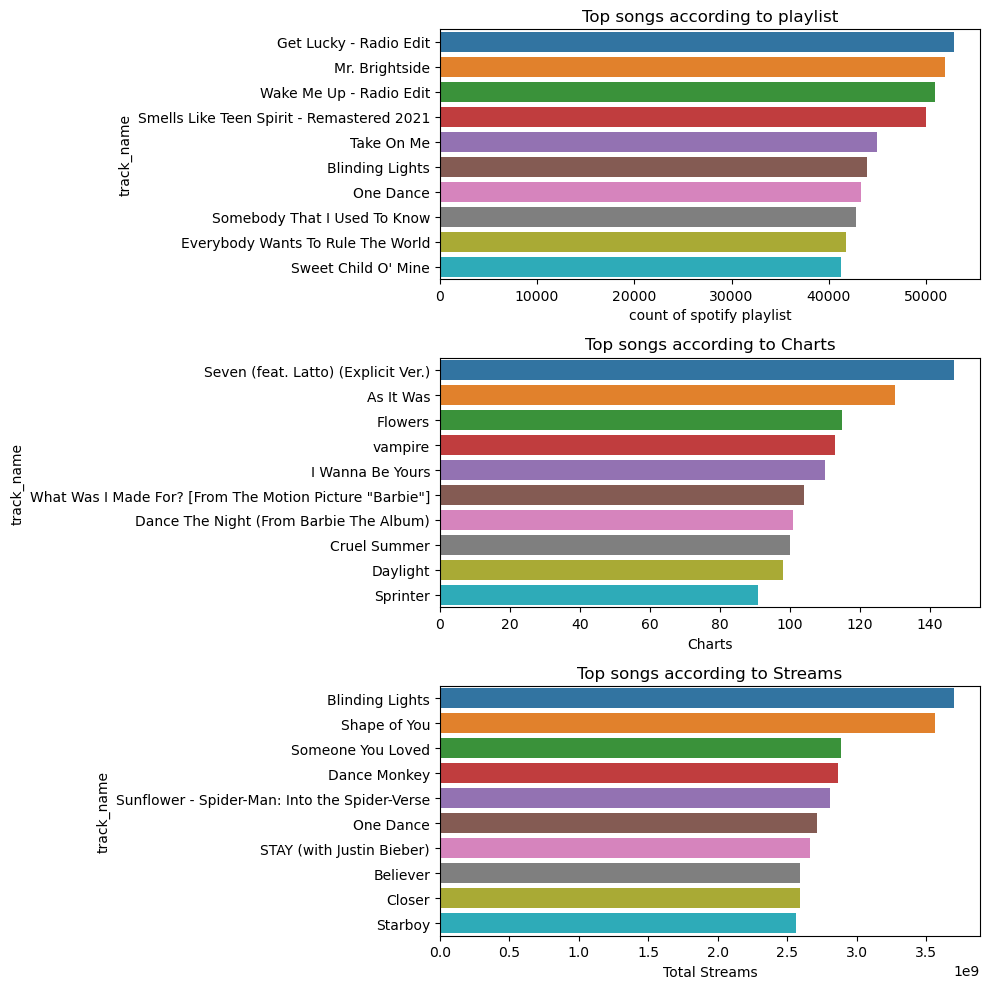

In [20]:
play = df.sort_values(by='in_spotify_playlists', ascending=False)
play = play[['track_name', 'in_spotify_playlists']][:10]

chart = df.sort_values(by='in_spotify_charts', ascending=False)
chart = chart[['track_name', 'in_spotify_charts']][:10]

stream = df.sort_values(by='streams', ascending=False)
stream = stream[['track_name', 'streams']][:10]

fig, axes = plt.subplots(3,1,figsize=(10,10))
plt.subplot(3,1,1)
ax1 = sns.barplot(play, y='track_name', x='in_spotify_playlists')
ax1.set_xlabel('count of spotify playlist')
ax1.set_title('Top songs according to playlist')

plt.subplot(3,1,2)
ax1 = sns.barplot(chart, y='track_name', x='in_spotify_charts')
ax1.set_xlabel('Charts')
ax1.set_title('Top songs according to Charts')


plt.subplot(3,1,3)
ax1 = sns.barplot(stream, y='track_name', x='streams')
ax1.set_xlabel('Total Streams')
ax1.set_title('Top songs according to Streams')

plt.tight_layout()
plt.show()

"Get Lucky - Radio Edit" was the most saved songs on chart, while "Blinding Lights" was the most streamed song. "Seven (feat. Latto)" was the Chart favourite song.

## Top 10 artist according to playlist, chart and total streams

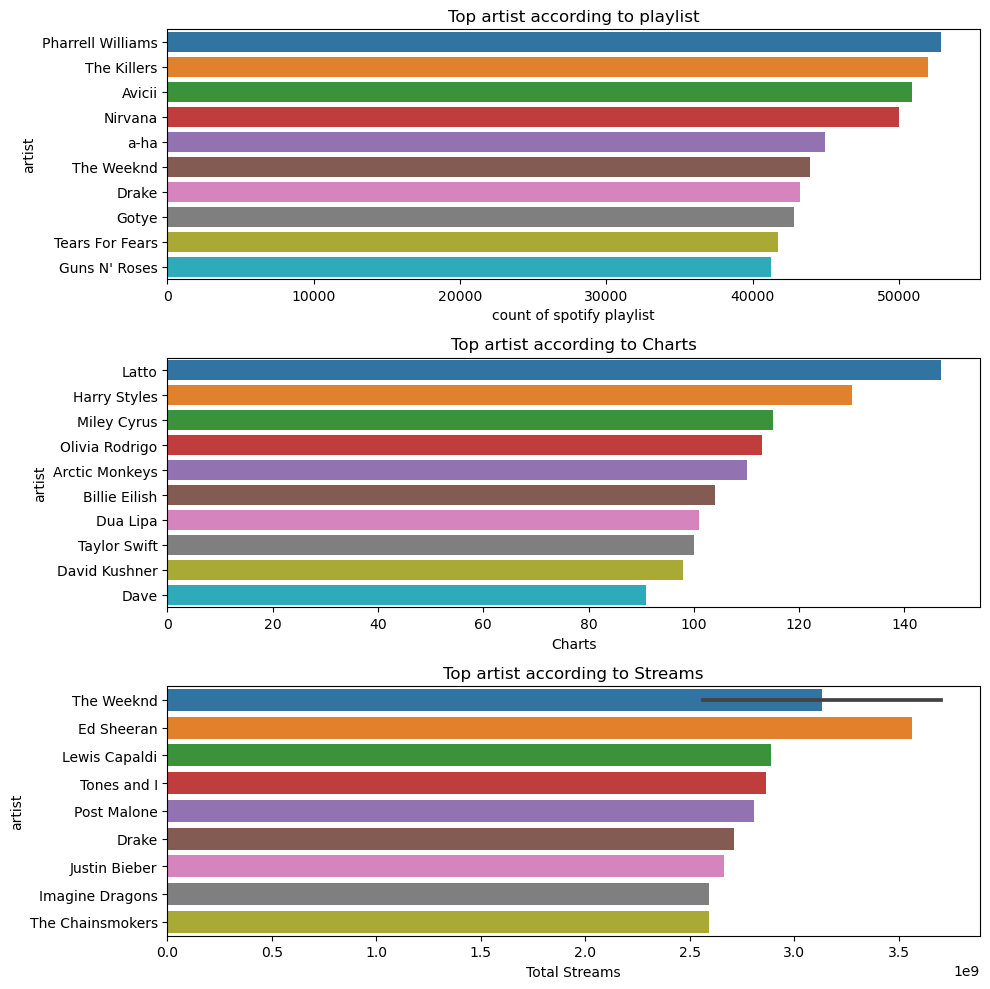

In [21]:
play = df.sort_values(by='in_spotify_playlists', ascending=False)
play = play[['artist', 'in_spotify_playlists']][:10]

chart = df.sort_values(by='in_spotify_charts', ascending=False)
chart = chart[['artist', 'in_spotify_charts']][:10]

stream = df.sort_values(by='streams', ascending=False)
stream = stream[['artist', 'streams']][:10]

fig, axes = plt.subplots(3,1,figsize=(10,10))
plt.subplot(3,1,1)
ax1 = sns.barplot(play, y='artist', x='in_spotify_playlists')
ax1.set_xlabel('count of spotify playlist')
ax1.set_title('Top artist according to playlist')

plt.subplot(3,1,2)
ax1 = sns.barplot(chart, y='artist', x='in_spotify_charts')
ax1.set_xlabel('Charts')
ax1.set_title('Top artist according to Charts')


plt.subplot(3,1,3)
ax1 = sns.barplot(stream, y='artist', x='streams')
ax1.set_xlabel('Total Streams')
ax1.set_title('Top artist according to Streams')

plt.tight_layout()
plt.show()

"Pharell Williams", "Latto" and "The Weeknd" dominated the playlist, chart and streams game respectively

## Top 10 artist by stream and their danceability, energy, valence and liveliness

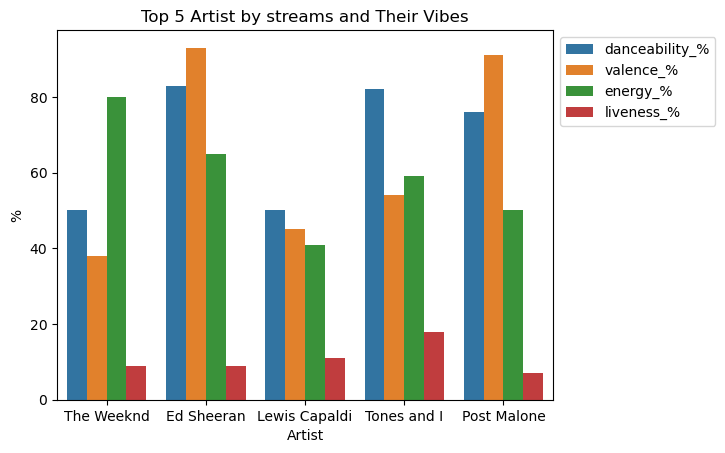

In [22]:
topten = df.sort_values(by='streams', ascending=False)
topten = topten[['artist', 'danceability_%', 'valence_%', 'energy_%', 'liveness_%', 'streams']][:5]
topten = pd.melt(topten, id_vars=['artist'], value_vars=['danceability_%', 'valence_%', 'energy_%', 'liveness_%'], var_name='type_of_%', value_name='value')

ax = sns.barplot(x='artist', y='value', hue='type_of_%', data=topten)
ax.legend(bbox_to_anchor=(1, 1))
ax.set(xlabel='Artist', ylabel='%')
ax.set_title('Top 5 Artist by streams and Their Vibes')

plt.show()

* "Ed Sheeran" and "Post Malone" songs are more cheerful or happy than rest of the artist (according to valency)
* "Tones and I" have to compete with "Ed Sheeran" for danceability of their songs
* "The Weeknd" have the most energetic songs
* All artist's songs are low on liveness


## Top 10 songs and their relation with danceability, valence, energy and liveness

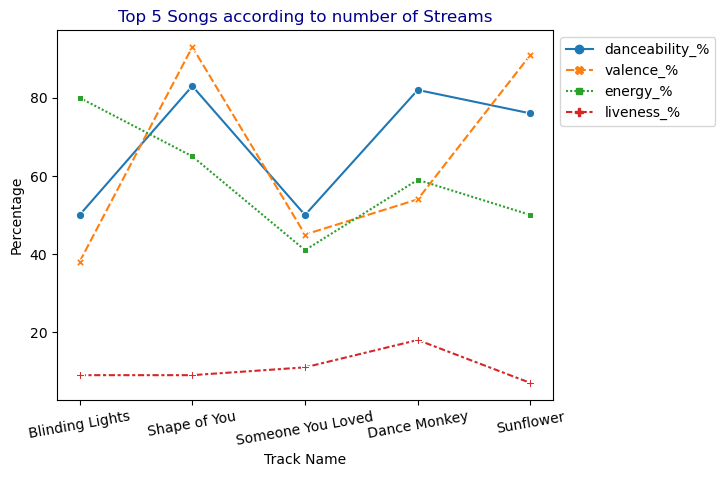

In [23]:
topten = df.sort_values(by='streams', ascending=False)
topten = topten[['track_name', 'danceability_%', 'valence_%', 'energy_%', 'liveness_%']][:5]
topten = topten.replace('Sunflower - Spider-Man: Into the Spider-Verse', 'Sunflower').set_index('track_name')

ax = sns.lineplot(data=topten, markers=True)
ax.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=10)
plt.title("Top 5 Songs according to number of Streams", fontsize = 12, color = 'darkblue')
ax.set_ylabel('Percentage')
ax.set_xlabel('Track Name')

plt.show()

* "Shape of You" and "Sunflower" are more positive songs
* "Dance Monkey" and "Shape of You" are best songs to dance on
* "Blinding Lights" is the most energetic song